In [2]:
# Below, I reran Jeremy Howard's notebook listed at https://www.kaggle.com/jhoward/nb-svm-strong-linear-baseline/notebook
import pandas as pd, numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from __future__ import print_function

train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
subm = pd.read_csv('data/sample_submission.csv')

In [3]:
lens = train.comment_text.str.len()
lens.mean(), lens.std(), lens.max()

(394.7120842759649, 591.9907293798376, 5895)

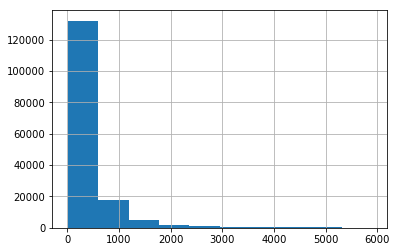

In [4]:
%matplotlib inline

lens.hist()

In [5]:
label_cols = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
train['none'] = 1-train[label_cols].max(axis=1)
train.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate,none
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805,0.898321
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420,0.302226
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
#And using 1/10 data to fit in my memory. When submitting to Kaggle, this won't be needed.
train = train.sample(frac=0.1)
train.shape

(15957, 9)

In [7]:
#Fixing for cross-validation for now. When submitting to Kaggle, this won't be needed.
from sklearn.model_selection import train_test_split
train, test = train_test_split(train, test_size=0.1) # Next time, try shuffle=False

In [8]:
len(train),len(test)

(14361, 1596)

In [9]:
COMMENT = 'comment_text'
train[COMMENT].fillna("unknown", inplace=True)
test[COMMENT].fillna("unknown", inplace=True)

In [10]:
import re, string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [11]:
import re, string
re_tok = re.compile('([' + string.punctuation + "'" + '”¨«»®´·º½¾¿¡§£₤‘’])')

In [12]:
def tokenize(s): return re_tok.sub(r' \1 ', s).split()
n = train.shape[0]
vec = TfidfVectorizer(ngram_range=(1,2), tokenizer=tokenize,
               min_df=3, max_df=0.9, strip_accents='unicode', use_idf=1,
               smooth_idf=1, sublinear_tf=1 )
trn_term_doc = vec.fit_transform(train[COMMENT])
test_term_doc = vec.transform(test[COMMENT])

In [13]:
def pr(y_i, y):
    p = x[y==y_i].sum(0)
    return (p+1) / ((y==y_i).sum()+1)
x = trn_term_doc
test_x = test_term_doc
def get_mdl(y):
    y = y.values
    r = np.log(pr(1,y) / pr(0,y))
    m = LogisticRegression(C=4, dual=True)
    x_nb = x.multiply(r)
    return m.fit(x_nb, y), r
preds = np.zeros((len(test), len(label_cols)))

In [29]:
for i, j in enumerate(label_cols):
    print('fitting %s...'%(j))
    m,r = get_mdl(train[j])
    print('predicting...')
    pred = m.predict(test_x)
    print(pred.shape)
    print(np.mean(pred==test[j]))
    #preds[:,i] = m.predict_proba(test_x.multiply(r))[:,1]

fitting toxic...
predicting...
(1596,)
0.924185463659
fitting severe_toxic...
predicting...
(1596,)
0.988095238095
fitting obscene...
predicting...
(1596,)
0.949248120301
fitting threat...
predicting...
(1596,)
0.994360902256
fitting insult...
predicting...
(1596,)
0.951754385965
fitting identity_hate...
predicting...
(1596,)
0.989348370927


Result:

| label | accuracy | my baseline |
| ----- | -------- | ----------- |
| toxic | 0.9242 | 0.9197 |
| severe_toxic | 0.9881 | 0.9897 |
| obscene | 0.9492 | 0.9524 |
| threat | 0.9941 | 0.9971 |
| insult | 0.9518 | 0.9527 |
| identity_hate | 0.9893 | 0.9914 |



In [23]:
(preds[0:20,:]>0.5).astype(int)

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])